In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
file_path = '../dataset/cgt/new_consolidated.csv'
df = pd.read_csv(file_path, sep=',')

Dataset: CodeSmells
  Unique fp_sol: 551
  Unique fp_sol2: 532
  Unique fp_bytecode: 551
  Unique fp_runtime: 504
  Unique fp_ast: 287
  Unique fp_opcode: 103
  Unique fp_cfg: 470

Dataset: ContractFuzzer
  Unique fp_sol: 352
  Unique fp_sol2: 352
  Unique fp_bytecode: 274
  Unique fp_runtime: 347
  Unique fp_ast: 210
  Unique fp_opcode: 72
  Unique fp_cfg: 275

Dataset: Doublade
  Unique fp_sol: 237
  Unique fp_sol2: 237
  Unique fp_bytecode: 184
  Unique fp_runtime: 181
  Unique fp_ast: 134
  Unique fp_opcode: 48
  Unique fp_cfg: 141

Dataset: EthRacer
  Unique fp_sol: 109
  Unique fp_sol2: 109
  Unique fp_bytecode: 109
  Unique fp_runtime: 109
  Unique fp_ast: 65
  Unique fp_opcode: 14
  Unique fp_cfg: 90

Dataset: EverEvolvingG
  Unique fp_sol: 264
  Unique fp_sol2: 264
  Unique fp_bytecode: 264
  Unique fp_runtime: 263
  Unique fp_ast: 190
  Unique fp_opcode: 57
  Unique fp_cfg: 76

Dataset: JiuZhou
  Unique fp_sol: 164
  Unique fp_sol2: 162
  Unique fp_bytecode: 158
  Unique fp_r

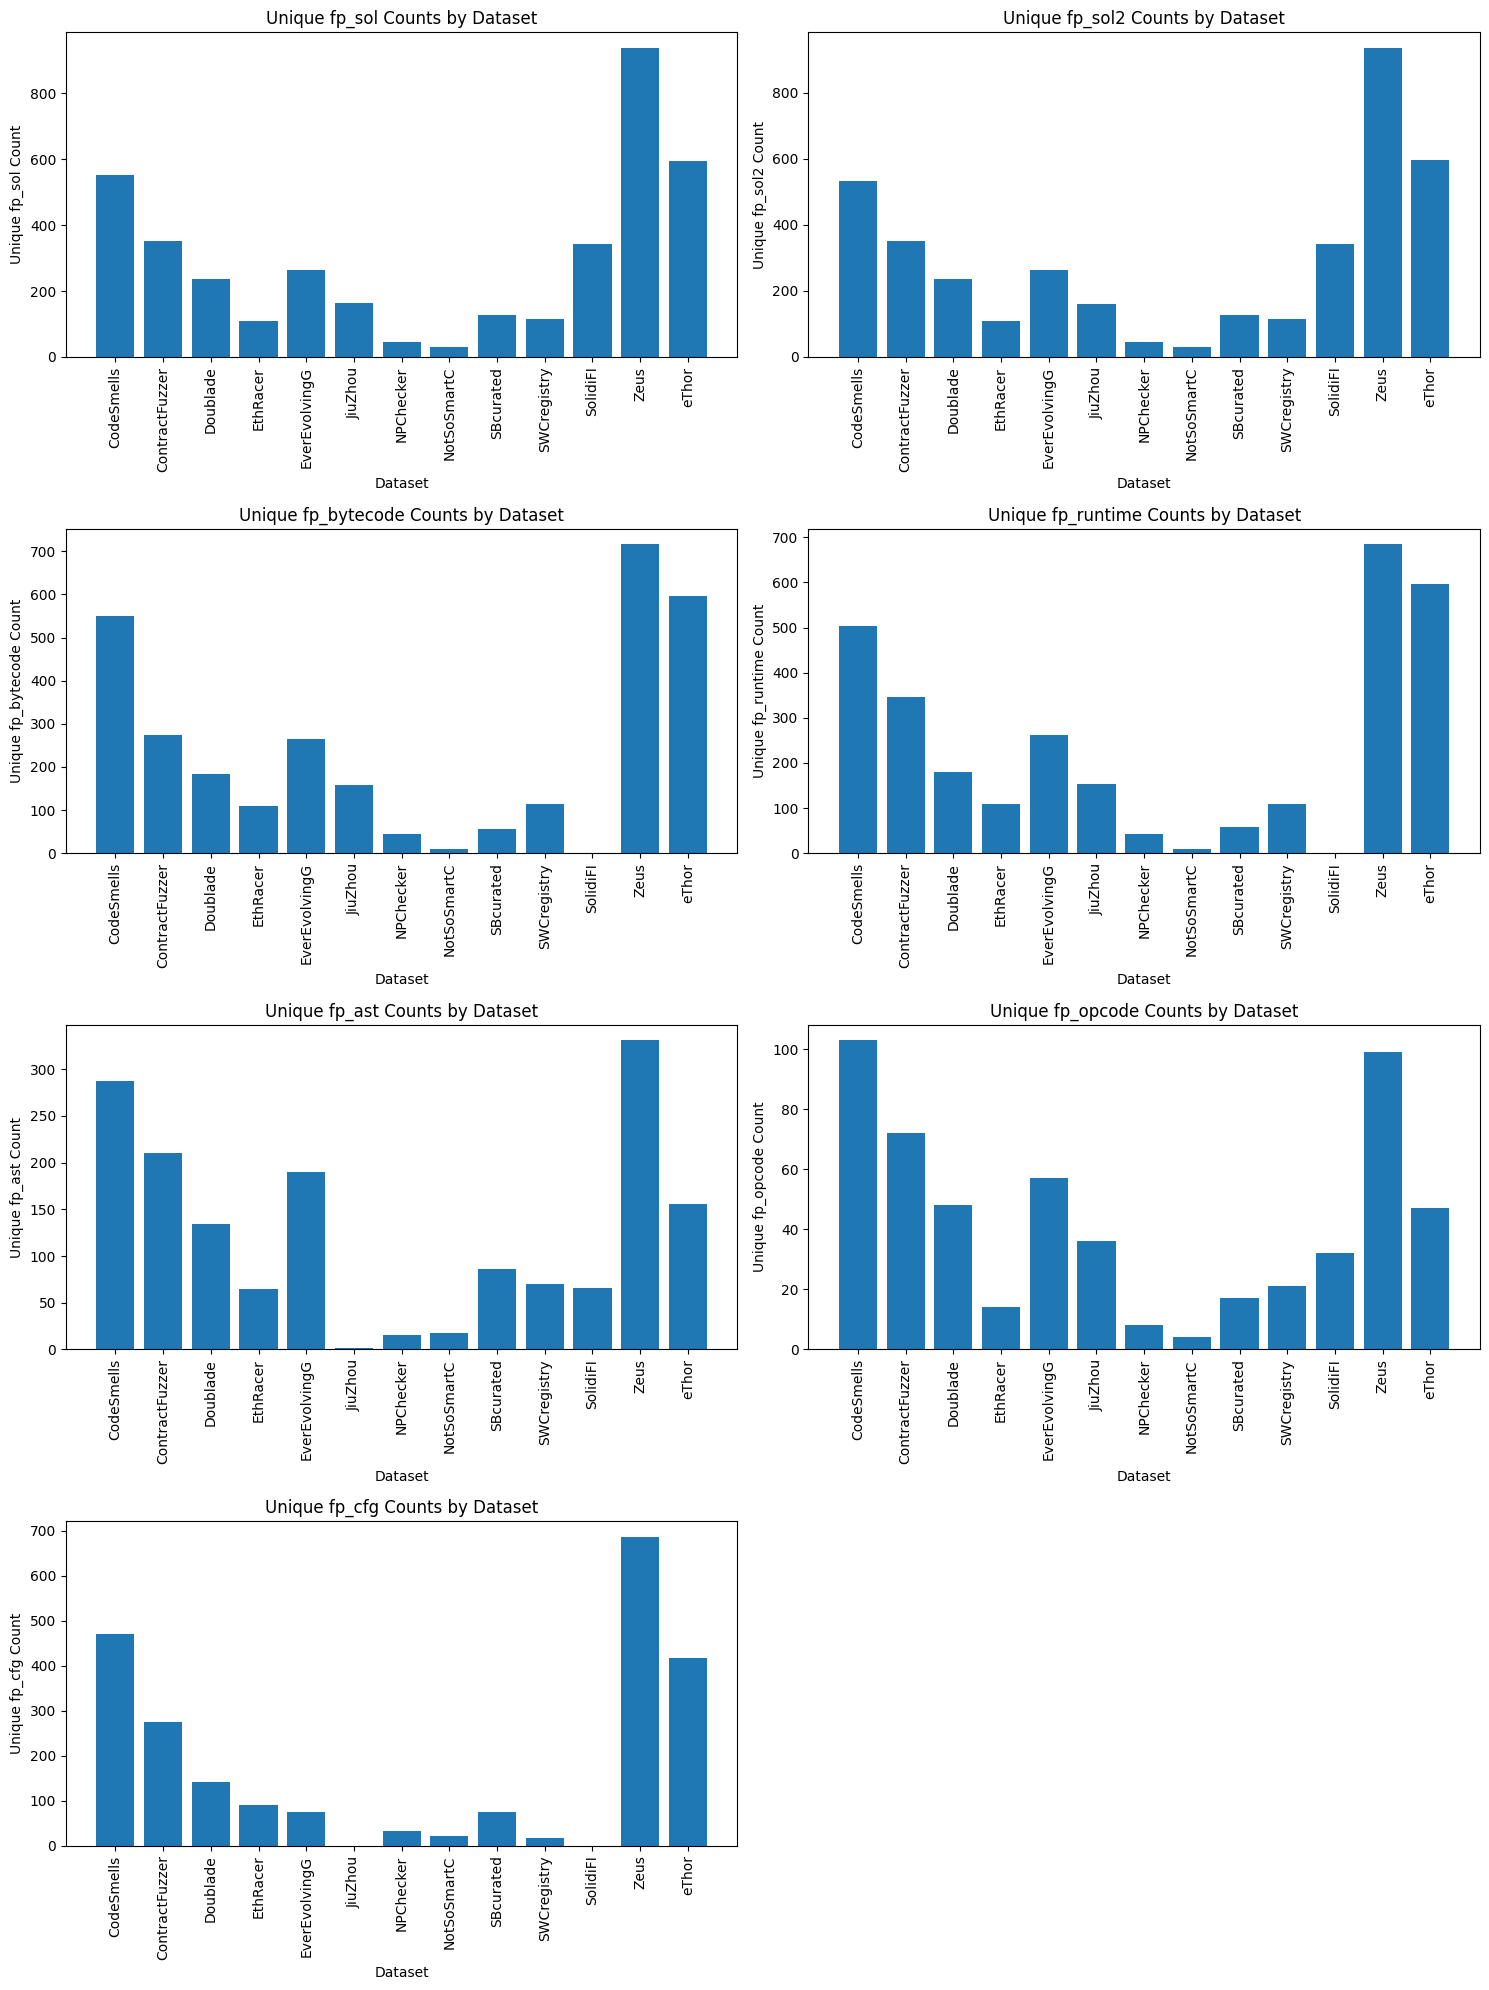

In [2]:
# Identify all columns starting with 'fp_'
fp_columns = [col for col in df.columns if col.startswith('fp_')]

# Group by the 'dataset' column and calculate unique counts for all 'fp_' columns
grouped = df.groupby('dataset').agg({col: pd.Series.nunique for col in fp_columns}).reset_index()

# Calculate the total unique counts across all datasets
totals = grouped[fp_columns].sum().to_frame().T
totals['dataset'] = 'Total'
totals = totals[['dataset'] + fp_columns]

# Append the totals row to the grouped DataFrame
grouped = pd.concat([grouped, totals], ignore_index=True)

# Convert 'dataset' column to string type
grouped['dataset'] = grouped['dataset'].astype(str)

# Separate the total row from the rest of the data
grouped_no_total = grouped[grouped['dataset'] != 'Total']

# Print the results
for index, row in grouped.iterrows():
    dataset = row['dataset']
    print(f"Dataset: {dataset}")
    for col in fp_columns:
        print(f"  Unique {col}: {row[col]}")
    print()

# Plot histograms for all 'fp_' columns, excluding the 'Total' row
num_cols = len(fp_columns)
num_rows = (num_cols + 1) // 2  # Ensure there are enough rows for all subplots

fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten axs in case it's 2D
axs = axs.ravel()

for i, col in enumerate(fp_columns):
    axs[i].bar(grouped_no_total['dataset'], grouped_no_total[col])
    axs[i].set_title(f'Unique {col} Counts by Dataset')
    axs[i].set_xlabel('Dataset')
    axs[i].set_ylabel(f'Unique {col} Count')
    axs[i].tick_params(axis='x', rotation=90)

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    axs[j].set_visible(False)

plt.tight_layout()
plt.show()


Number of unique properties for each dataset (case insensitive):
dataset
CodeSmells        20
ContractFuzzer     7
Doublade           5
EthRacer           2
EverEvolvingG      5
JiuZhou           52
NPChecker          5
NotSoSmartC       18
SBcurated         16
SWCregistry       33
SolidiFI           7
Zeus               7
eThor              1
Name: property, dtype: int64


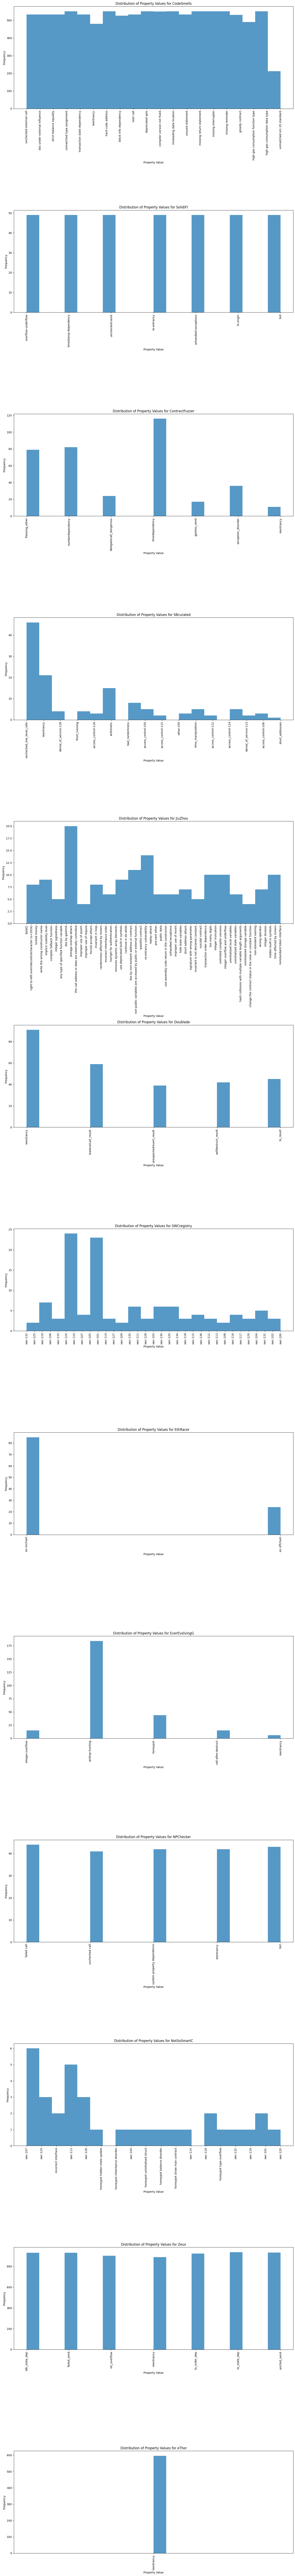

Number of unique properties for each data type per dataset after dropping NaN values (case insensitive):
fp_sol:
dataset
CodeSmells        20
ContractFuzzer     7
Doublade           5
EthRacer           2
EverEvolvingG      5
JiuZhou           52
NPChecker          5
NotSoSmartC       18
SBcurated         16
SWCregistry       33
SolidiFI           7
Zeus               7
eThor              1
Name: property, dtype: int64
fp_bytecode:
dataset
CodeSmells        20
ContractFuzzer     7
Doublade           5
EthRacer           2
EverEvolvingG      5
JiuZhou           52
NPChecker          5
NotSoSmartC        7
SBcurated          7
SWCregistry       33
Zeus               7
eThor              1
Name: property, dtype: int64
fp_runtime:
dataset
CodeSmells        20
ContractFuzzer     7
Doublade           5
EthRacer           2
EverEvolvingG      5
JiuZhou           52
NPChecker          5
NotSoSmartC        7
SBcurated          7
SWCregistry       33
Zeus               7
eThor              1
Nam

In [20]:
# Assuming the dataframe is already loaded as df
property_values = df[['dataset', 'property']]
unique_datasets = property_values['dataset'].unique()

# Calculate and print the number of unique properties for each dataset considering case insensitivity
unique_properties_counts = property_values.groupby('dataset')['property'].apply(lambda x: x.str.lower().nunique())
print("Number of unique properties for each dataset (case insensitive):")
print(unique_properties_counts)

# Plot the distribution of the values of the column "property" for each dataset
fig, axs = plt.subplots(len(unique_datasets), 1, figsize=(15, 10 * len(unique_datasets)))

for i, dataset in enumerate(unique_datasets):
    dataset_values = property_values[property_values['dataset'] == dataset]['property'].str.lower()
    axs[i].hist(dataset_values, bins=20, alpha=0.75)
    axs[i].set_title(f'Distribution of Property Values for {dataset}')
    axs[i].set_xlabel('Property Value')
    axs[i].set_ylabel('Frequency')
    axs[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

# Function to calculate unique properties per dataset for a given column
def calculate_unique_properties_per_dataset(df, column):
    return df.dropna(subset=[column]).groupby('dataset')["property"].apply(lambda x: x.str.lower().nunique())

# Calculating unique properties per dataset for each data type
unique_fp_sol_counts = calculate_unique_properties_per_dataset(df, 'fp_sol')
unique_fp_bytecode_counts = calculate_unique_properties_per_dataset(df, 'fp_bytecode')
unique_fp_runtime_counts = calculate_unique_properties_per_dataset(df, 'fp_runtime')

print("Number of unique properties for each data type per dataset after dropping NaN values (case insensitive):")
print("fp_sol:")
print(unique_fp_sol_counts)
print("fp_bytecode:")
print(unique_fp_bytecode_counts)
print("fp_runtime:")
print(unique_fp_runtime_counts)


Statistics for dataset: CodeSmells
        frequency
count  152.000000
mean     3.618421
std      8.678156
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     77.000000
                                  property_combination  frequency
0    (Compiler Version not fixed, High Gas Consumpt...         77
1    (Compiler Version not fixed, Deprecated APIs, ...         46
2    (Compiler Version not fixed, High Gas Consumpt...         37
3    (Compiler Version not fixed, Missing Interrupter)         31
4    (Compiler Version not fixed, Deprecated APIs, ...         25
..                                                 ...        ...
147  (Compiler Version not fixed, Deprecated APIs, ...          1
148  (Compiler Version not fixed, Missing Interrupt...          1
149  (Compiler Version not fixed, Deprecated APIs, ...          1
150  (Compiler Version not fixed, Deprecated APIs, ...          1
151  (Block Info Dependency, Deprecated APIs, Hard ...          1

[152 rows 

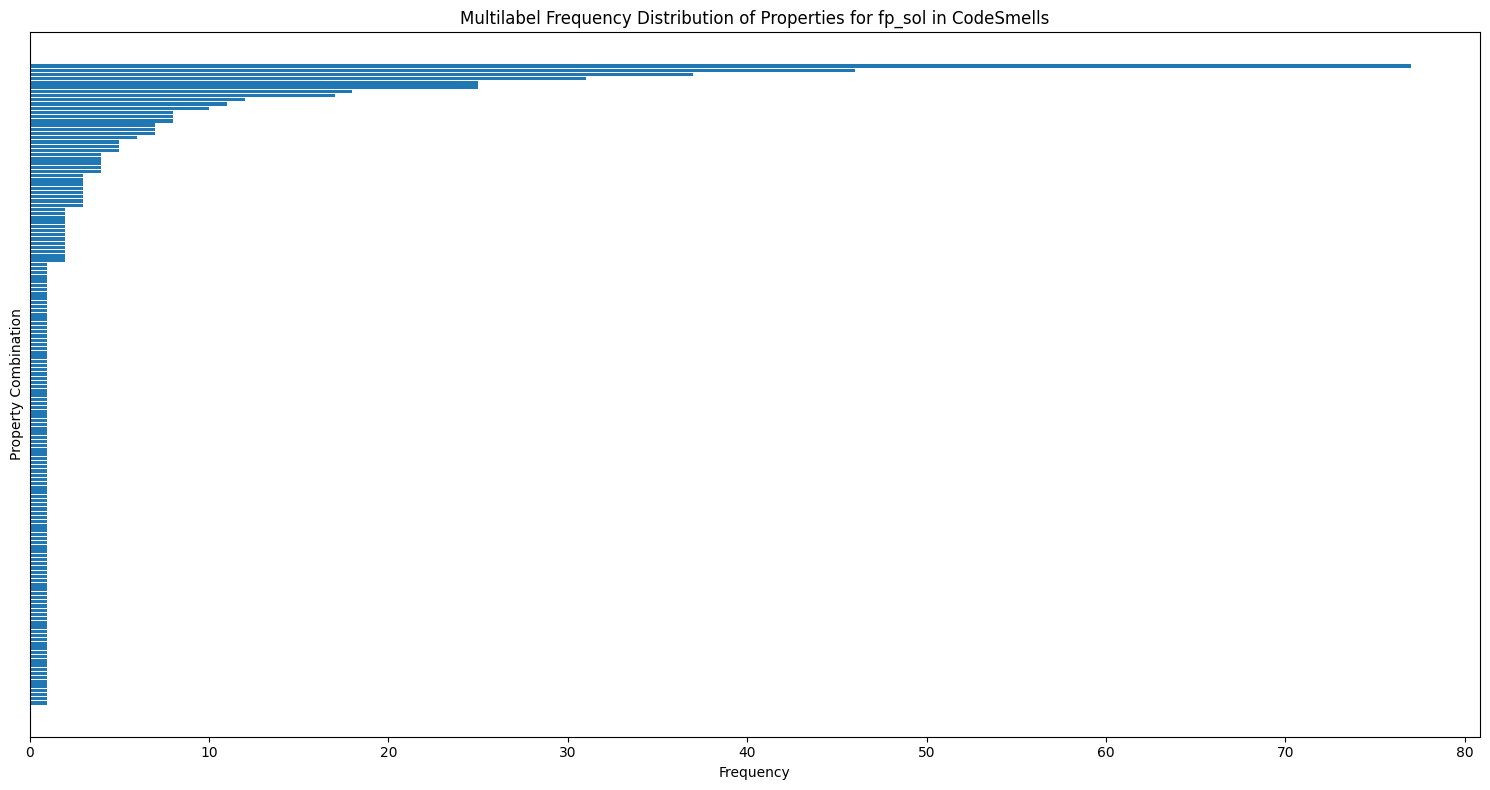

Statistics for dataset: SolidiFI
       frequency
count        7.0
mean        49.0
std          0.0
min         49.0
25%         49.0
50%         49.0
75%         49.0
max         49.0
      property_combination  frequency
0        (Unchecked-Send,)         49
1             (tx.origin,)         49
2                   (TOD,)         49
3    (Overflow-Underflow,)         49
4  (Unhandled-Exceptions,)         49
5  (Timestamp-Dependency,)         49
6           (Re-entrancy,)         49


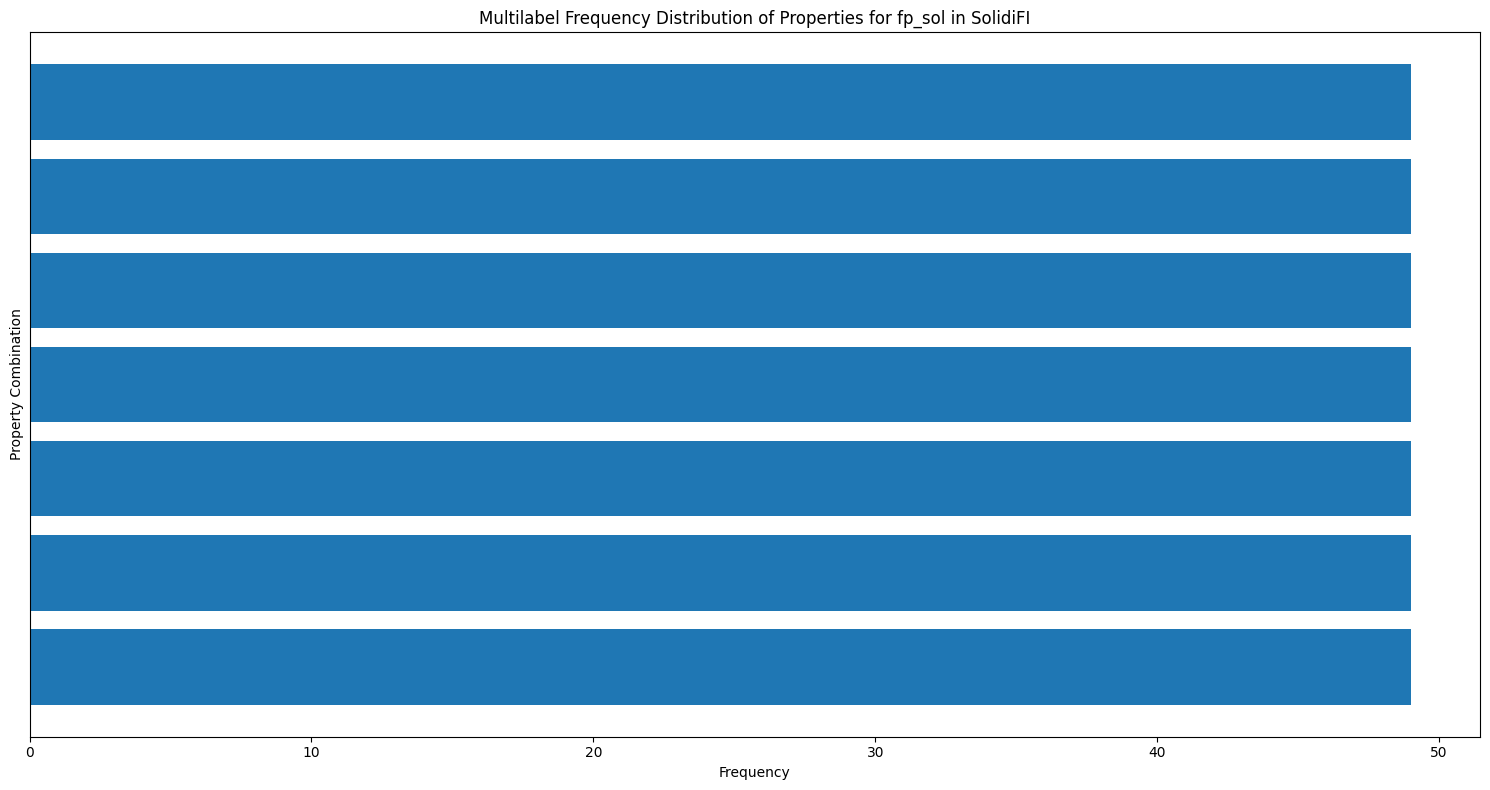

Statistics for dataset: ContractFuzzer
        frequency
count   12.000000
mean    29.333333
std     38.298667
min      1.000000
25%      2.000000
50%     10.500000
75%     38.500000
max    112.000000
                            property_combination  frequency
0                              (timedependency,)        112
1                            (numberdependency,)         79
2                              (freezing_ether,)         79
3                          (exception_disorder,)         25
4                      (delegatecall_dangerous,)         23
5                                  (reentrancy,)         11
6                                (gasless_send,)         10
7             (exception_disorder, gasless_send)          7
8           (exception_disorder, timedependency)          2
9             (numberdependency, timedependency)          2
10        (exception_disorder, numberdependency)          1
11  (delegatecall_dangerous, exception_disorder)          1


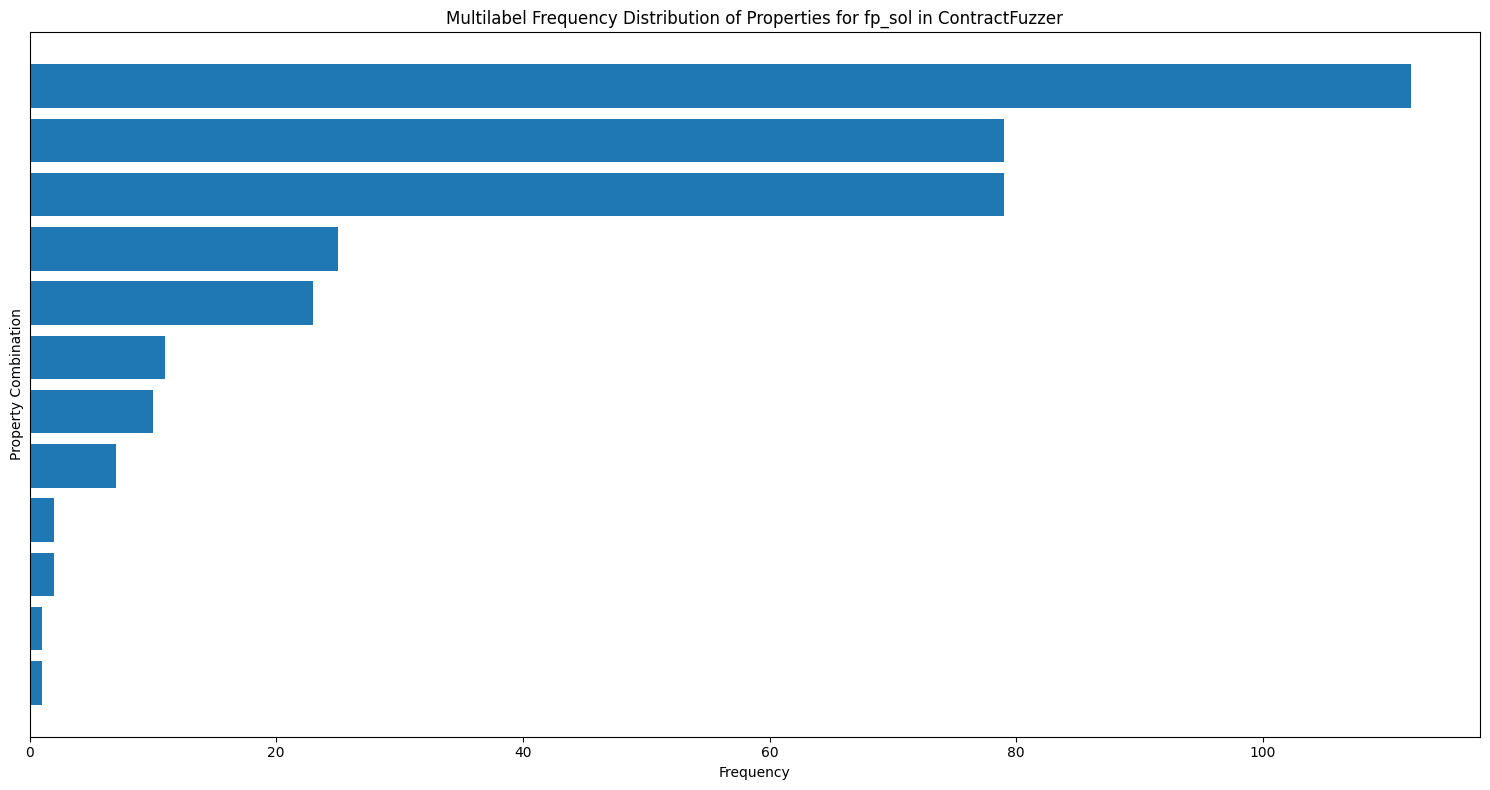

Statistics for dataset: SBcurated
       frequency
count   18.00000
mean     7.00000
std     10.73751
min      1.00000
25%      2.00000
50%      3.00000
75%      5.00000
max     45.00000
                        property_combination  frequency
0               (unchecked_low_level_calls,)         45
1                              (reentrancy,)         20
2                              (arithmetic,)         15
3                          (bad_randomness,)          8
4                       (time_manipulation,)          5
5                      (access_control-105,)          5
6                           (front_running,)          4
7                   (denial_of_service-128,)          4
8                               (other-109,)          3
9                      (access_control-124,)          3
10                     (access_control-118,)          3
11                     (access_control-115,)          2
12                     (access_control-112,)          2
13                  (denial_o

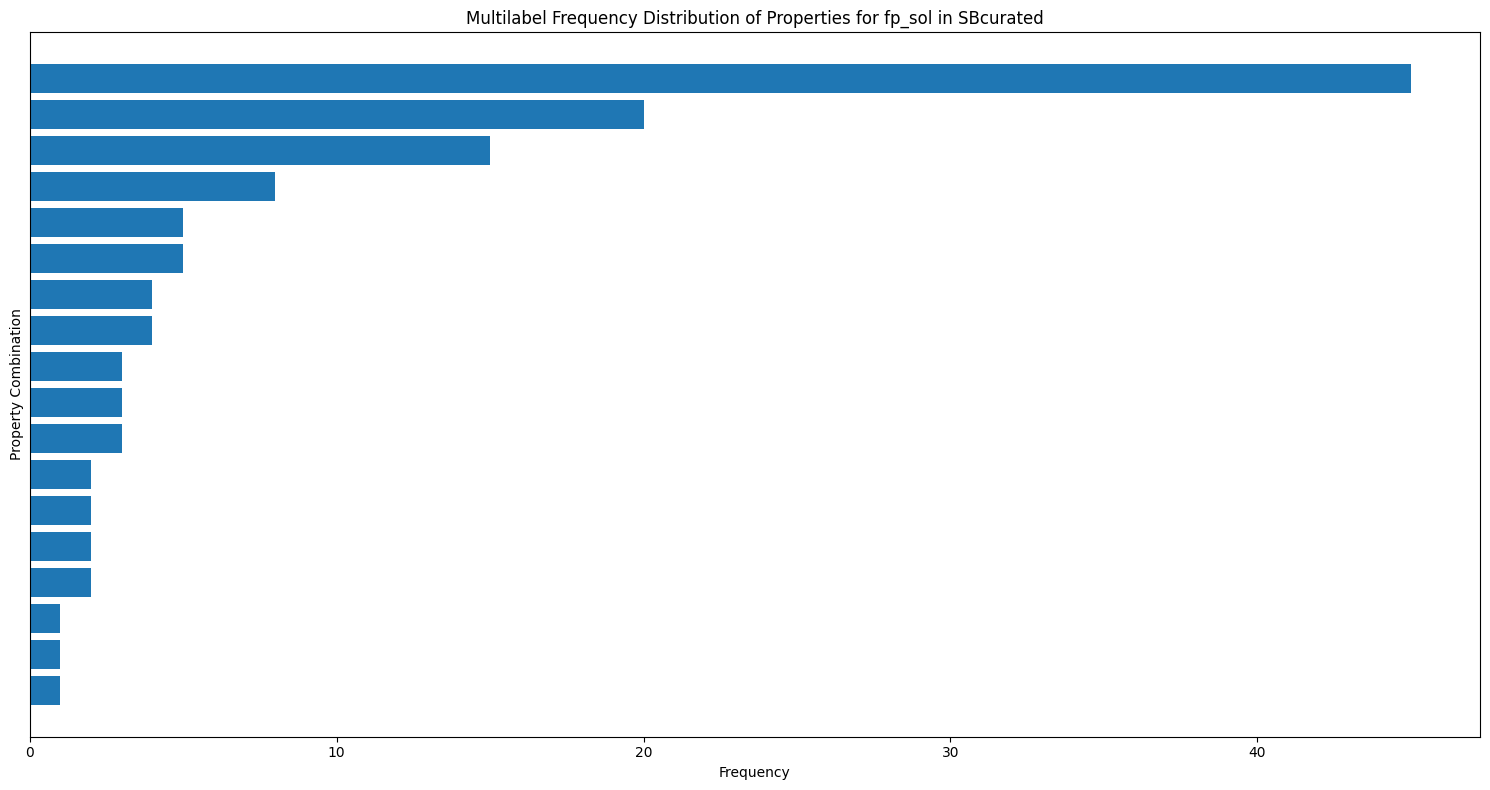

Statistics for dataset: JiuZhou
       frequency
count  52.000000
mean    1.288462
std     0.636675
min     1.000000
25%     1.000000
50%     1.000000
75%     1.000000
max     4.000000
                                 property_combination  frequency
0                                  (DOS by gaslimit,)          4
1                        (Re-entrancy vulnerability,)          3
2          (DOS by non-existent address or contract,)          3
3                                    (Replay attack,)          2
4                      (Unlimited compiler versions,)          2
5                 (Write the wrong constructor name,)          2
6                   (integer overflow and underflow,)          2
7                      (Nonstandard token interface,)          2
8                        (Implicit visibility level,)          2
9                          (Time affected by miners,)          2
10  (The call address or data are externally contr...          2
11                            (Forc

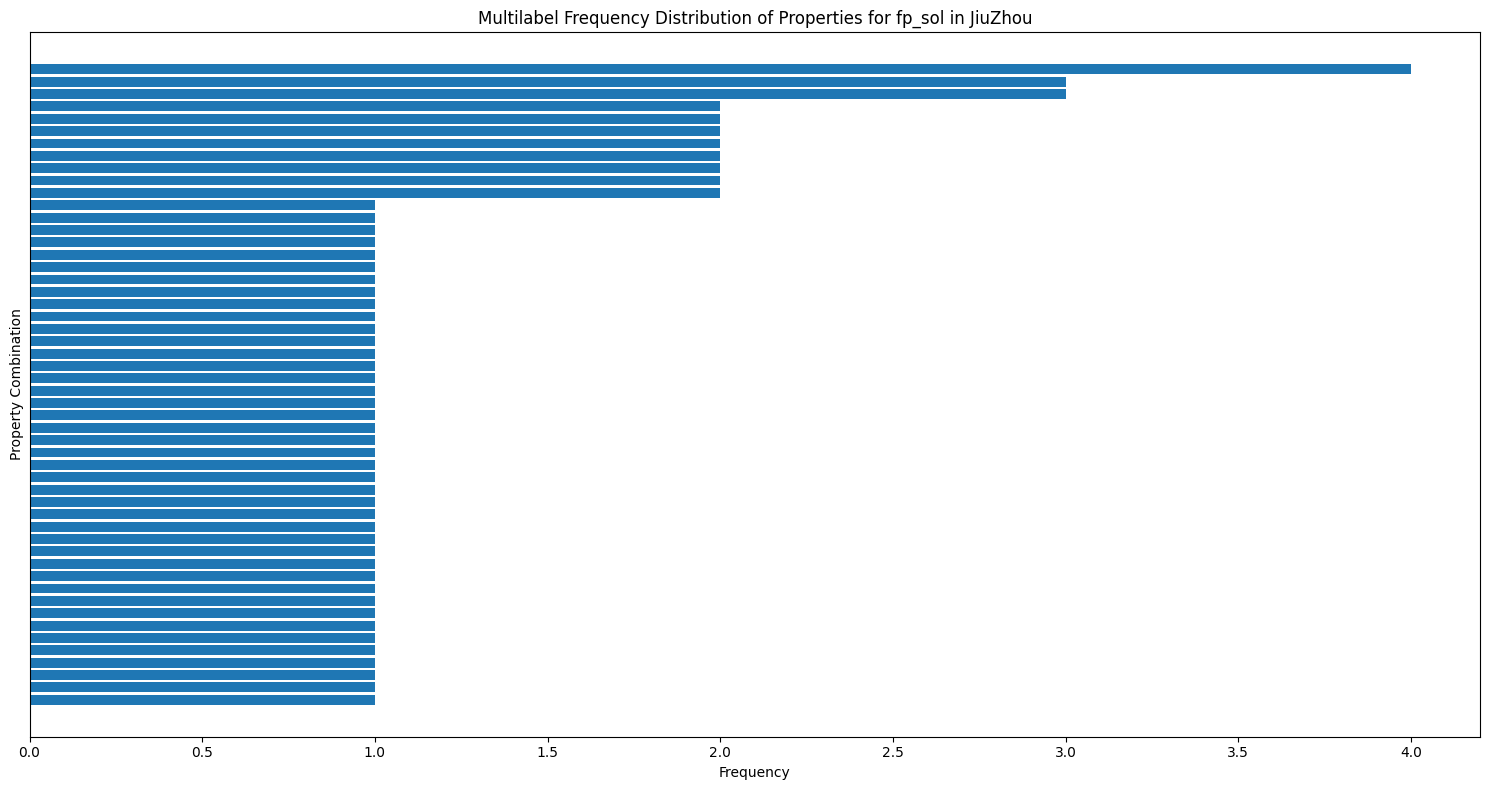

Statistics for dataset: Doublade
       frequency
count   8.000000
mean   13.625000
std    15.174579
min     1.000000
25%     4.250000
50%     8.000000
75%    16.750000
max    46.000000
                    property_combination  frequency
0                 (lowlevelcall_result,)         46
1             (unexpectedrevert_result,)         25
2                          (reentrancy,)         14
3                           (tx_result,)          9
4                 (selfdestruct_result,)          7
5       (lowlevelcall_result, tx_result)          5
6                (reentrancy, tx_result)          2
7  (reentrancy, unexpectedrevert_result)          1


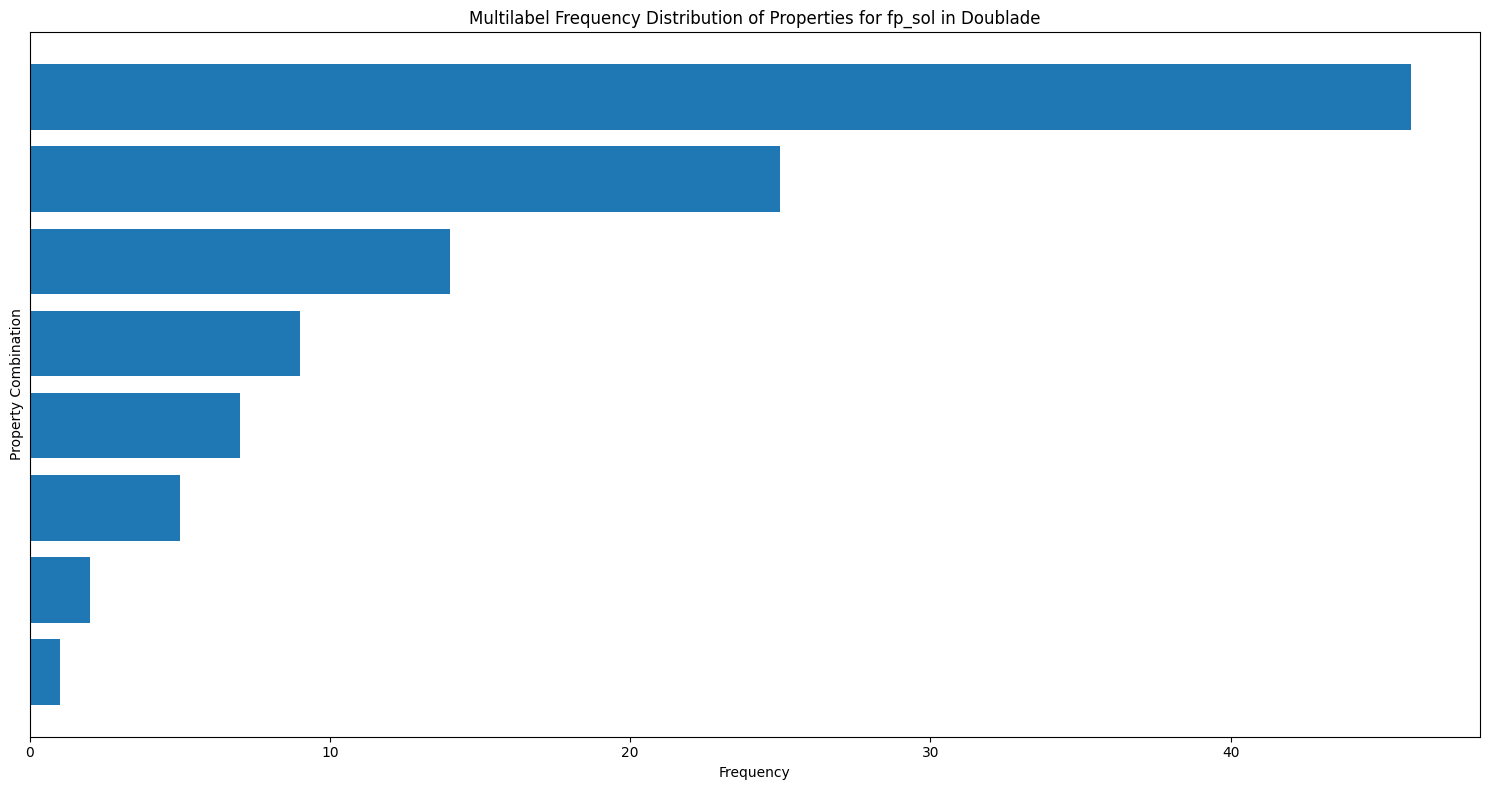

Statistics for dataset: SWCregistry
       frequency
count  33.000000
mean    2.303030
std     2.579787
min     1.000000
25%     1.000000
50%     1.000000
75%     2.000000
max    14.000000
   property_combination  frequency
0            (SWC-110,)         14
1            (SWC-101,)          7
2            (SWC-105,)          7
3            (SWC-120,)          3
4            (SWC-129,)          3
5            (SWC-106,)          3
6            (SWC-128,)          3
7            (SWC-103,)          3
8            (SWC-131,)          2
9            (SWC-119,)          2
10           (SWC-118,)          2
11           (SWC-135,)          2
12           (SWC-107,)          2
13           (SWC-124,)          2
14           (SWC-116,)          2
15           (SWC-114,)          2
16           (SWC-111,)          1
17           (SWC-115,)          1
18           (SWC-125,)          1
19           (SWC-100,)          1
20           (SWC-133,)          1
21           (SWC-117,)          1
22    

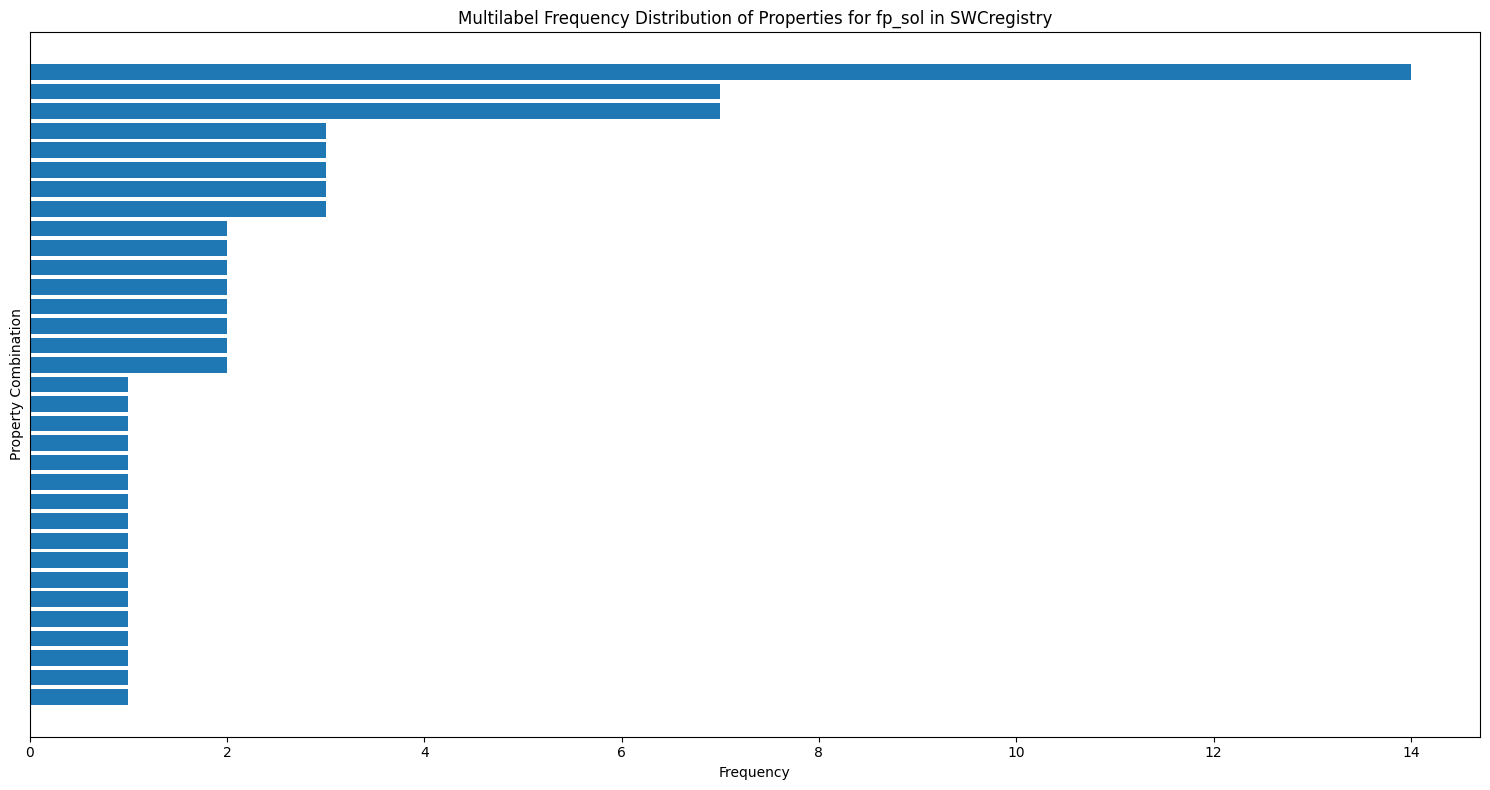

Statistics for dataset: EthRacer
       frequency
count   2.000000
mean   32.000000
std    16.970563
min    20.000000
25%    26.000000
50%    32.000000
75%    38.000000
max    44.000000
  property_combination  frequency
0        (EO onchain,)         44
1       (EO offchain,)         20


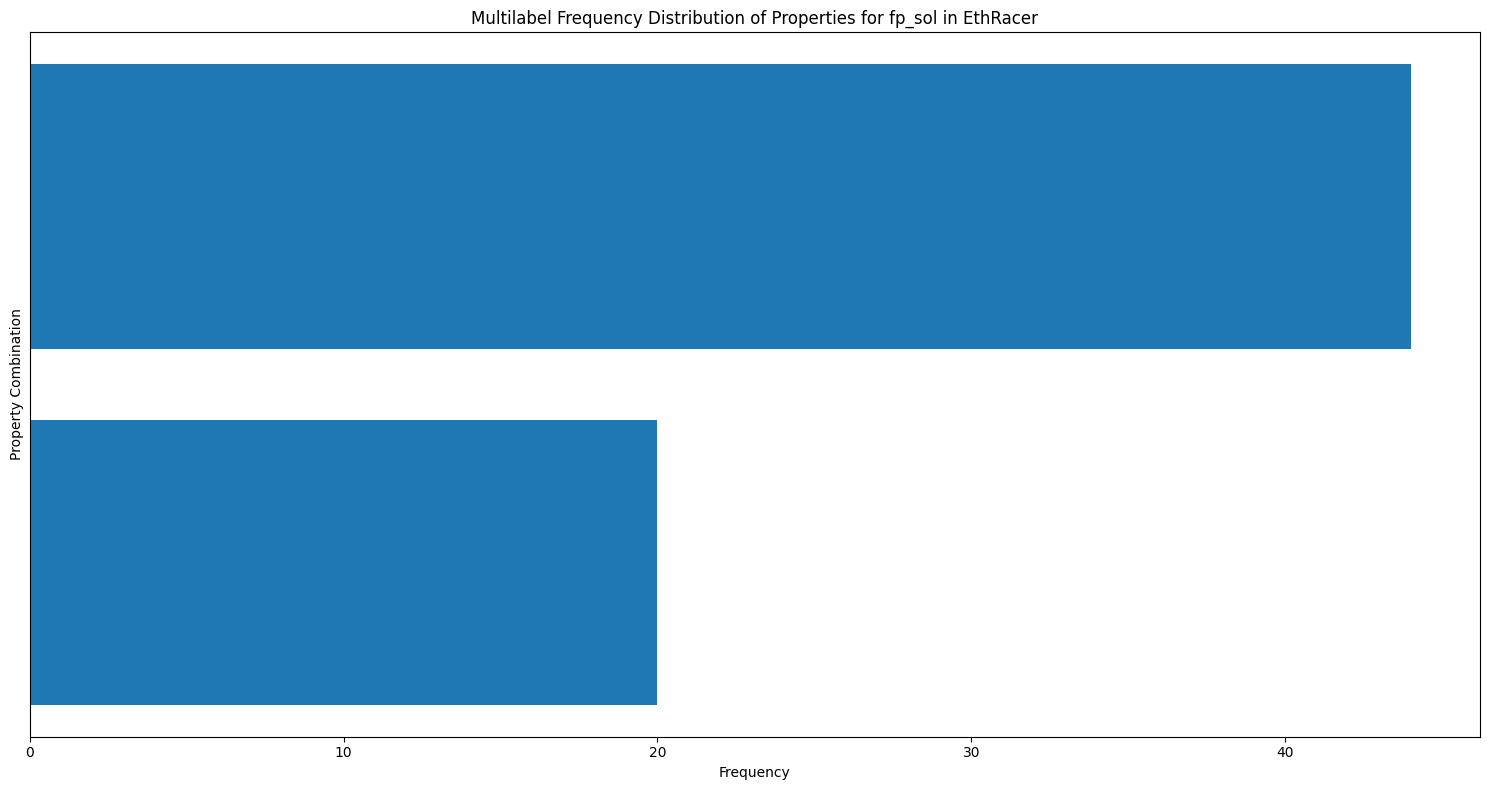

Statistics for dataset: EverEvolvingG
       frequency
count    5.00000
mean    52.80000
std     74.73085
min      6.00000
25%     15.00000
50%     15.00000
75%     44.00000
max    184.00000
     property_combination  frequency
0      (airdrop-hunting,)        184
1             (honeypot,)         44
2  (call-after-destruct,)         15
3     (integer-overflow,)         15
4           (reentrancy,)          6


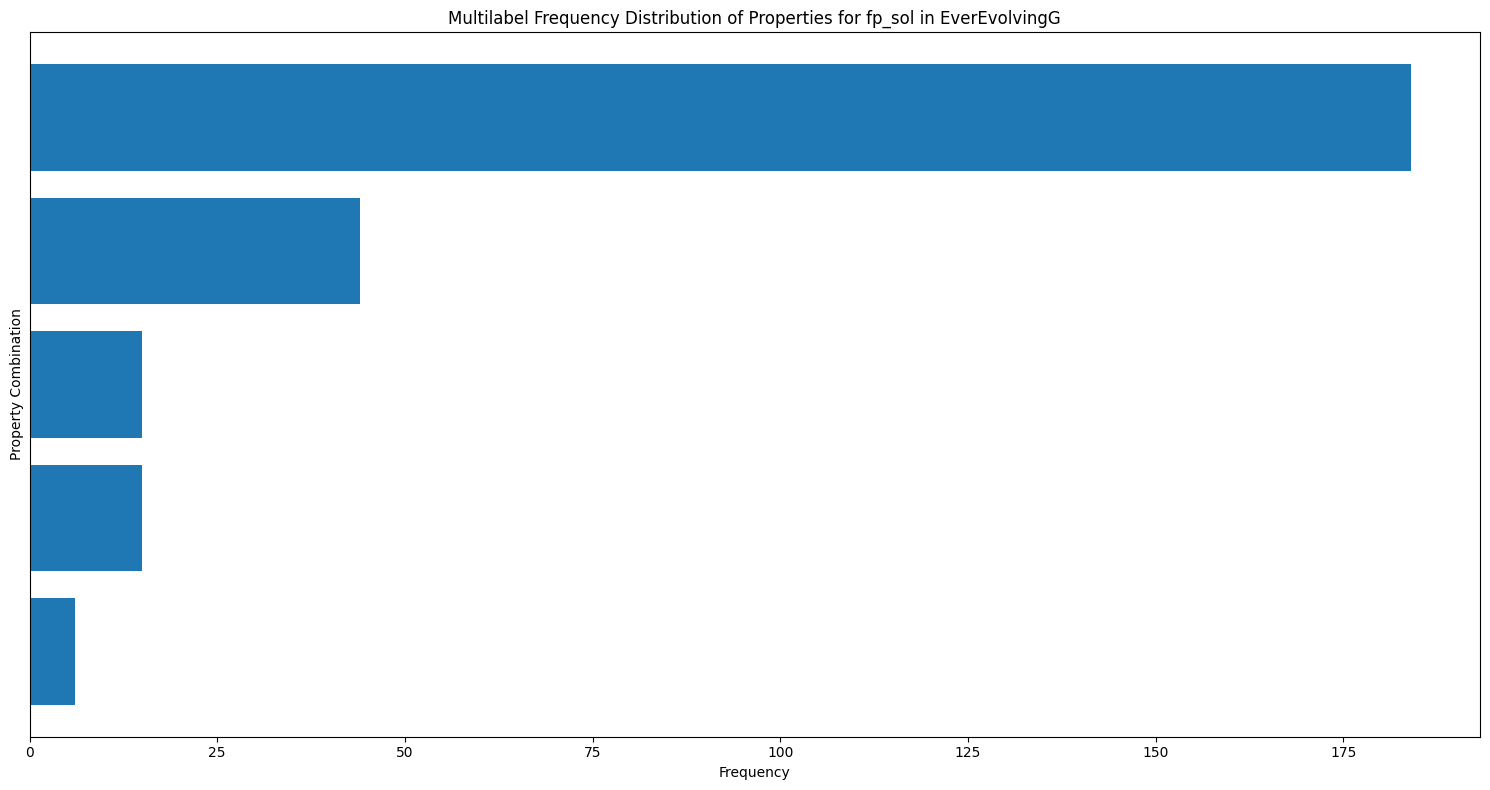

Statistics for dataset: NPChecker
       frequency
count   7.000000
mean    2.142857
std     1.676163
min     1.000000
25%     1.000000
50%     1.000000
75%     3.000000
max     5.000000
                           property_combination  frequency
0             (System Property Dependence, TOD)          5
1                             (Unchecked Call,)          4
2                                        (TOD,)          2
3                  (Reentrancy, Unchecked Call)          1
4  (System Property Dependence, Unchecked Call)          1
5                         (TOD, Unchecked Call)          1
6                            (Failed Call, TOD)          1


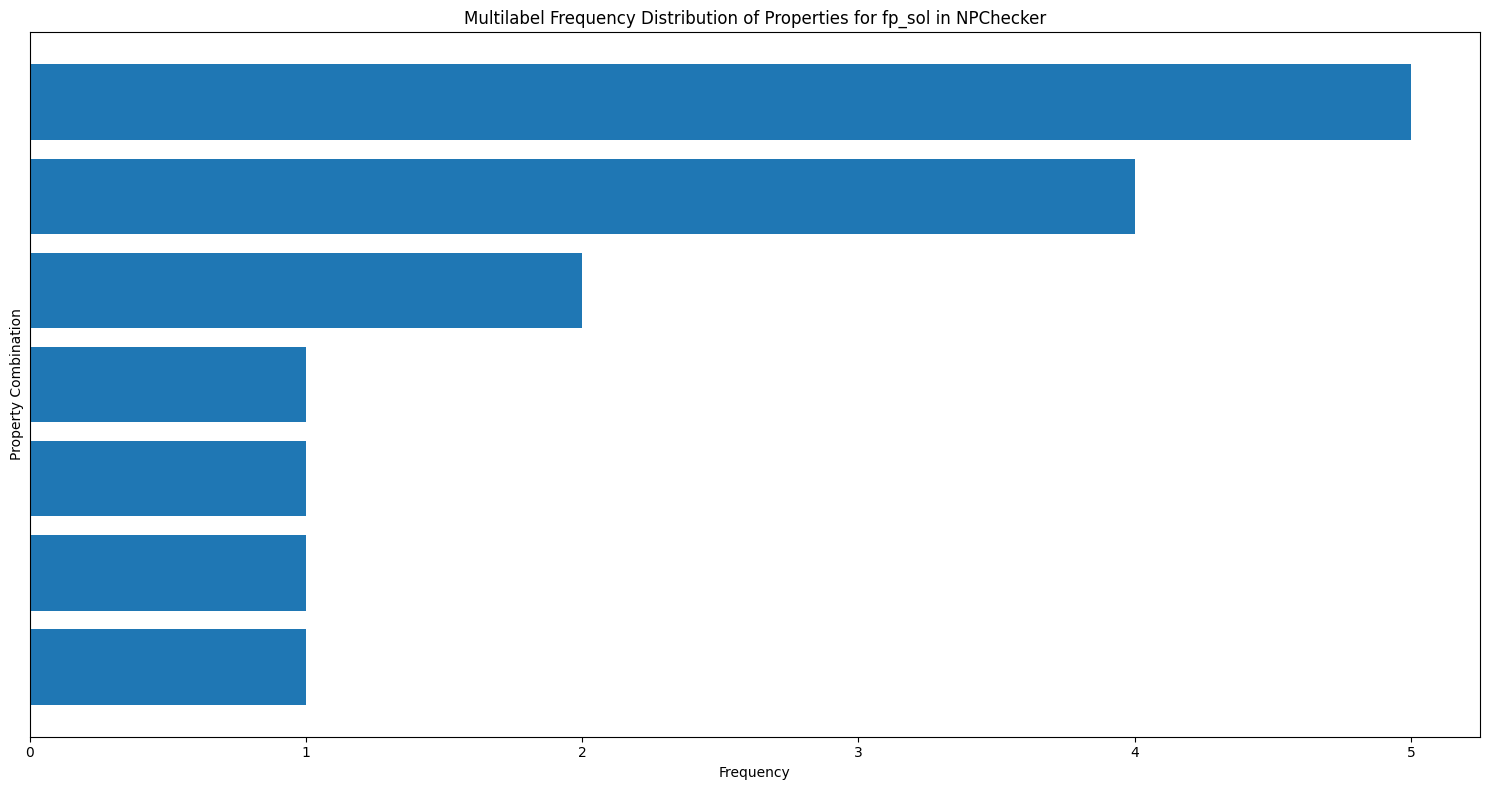

Statistics for dataset: NotSoSmartC
       frequency
count  18.000000
mean    1.277778
std     0.574513
min     1.000000
25%     1.000000
50%     1.000000
75%     1.000000
max     3.000000
                property_combination  frequency
0                         (SWC-107,)          3
1                         (SWC-124,)          2
2                         (SWC-113,)          2
3                         (SWC-118,)          2
4                         (SWC-119,)          1
5     (Honeypot Straw man contract,)          1
6                         (SWC-114,)          1
7       (Honeypot Balance disorder,)          1
8                 (SWC-113, SWC-128)          1
9                         (SWC-132,)          1
10  (Honeypot Uninitialised struct,)          1
11                        (SWC-104,)          1
12  (Honeypot Inheritance disorder,)          1
13                        (SWC-101,)          1
14            (Incorrect interface,)          1
15   (Honeypot Hidden state update,)       

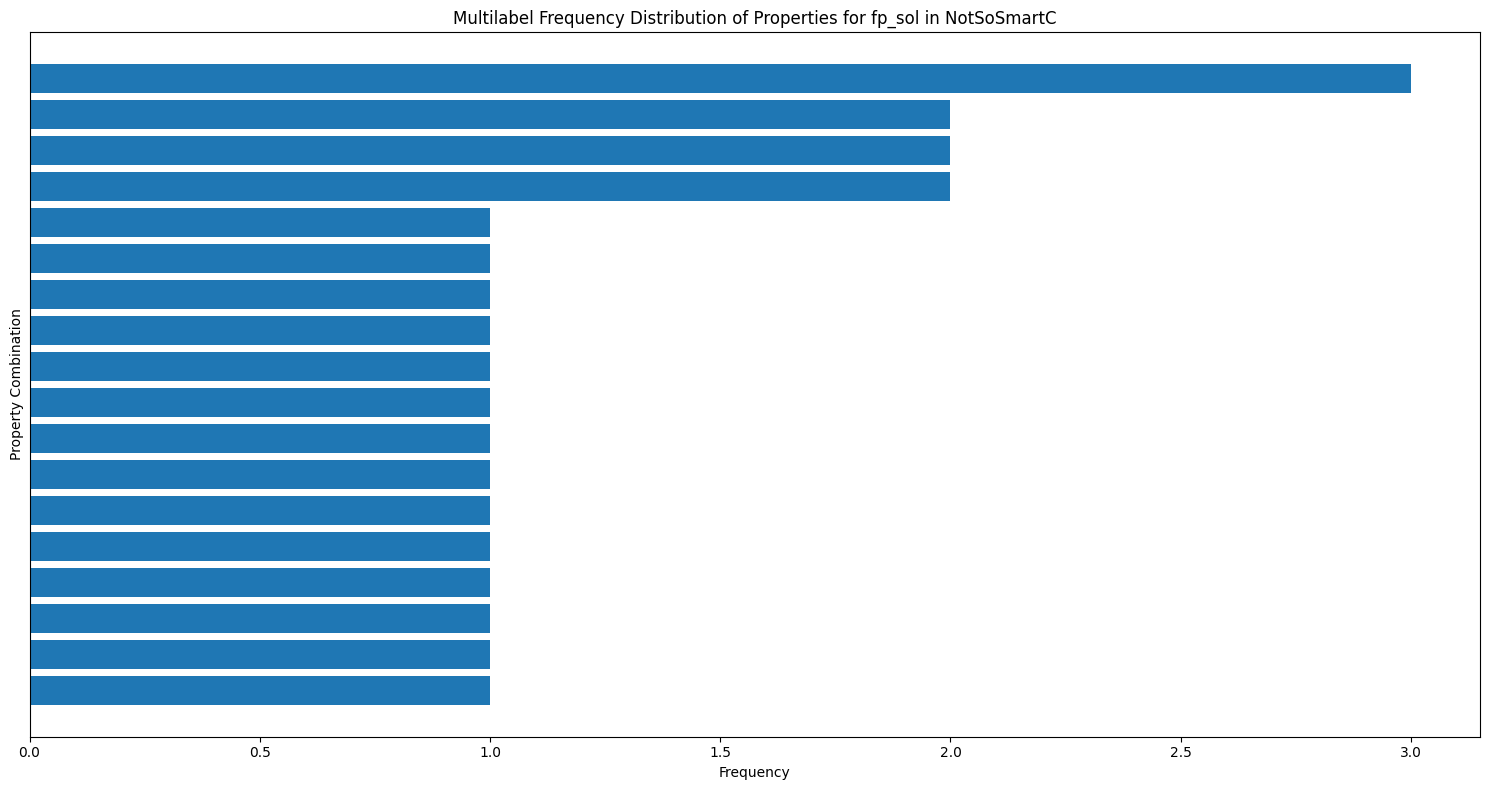

Statistics for dataset: Zeus
        frequency
count   36.000000
mean    19.888889
std     38.045670
min      1.000000
25%      1.000000
50%      4.500000
75%     14.500000
max    194.000000
                                 property_combination  frequency
0                                     (Int_overflow,)        194
1           (Int_overflow, Tx_Order_Dep, Unchkd_send)         98
2                         (Failed_send, Int_overflow)         77
3           (Failed_send, Int_overflow, Tx_Order_Dep)         66
4   (Blk_State_Dep, Failed_send, Int_overflow, Tx_...         52
5                        (Int_overflow, Tx_Order_Dep)         37
6   (Blk_State_Dep, Int_overflow, Tx_Order_Dep, Un...         36
7                                      (Failed_send,)         28
8                         (Failed_send, Tx_Order_Dep)         22
9   (Failed_send, Int_overflow, Tx_Order_Dep, Unch...         12
10                         (Int_overflow, Reentrancy)         10
11        (Blk_State_Dep, Int

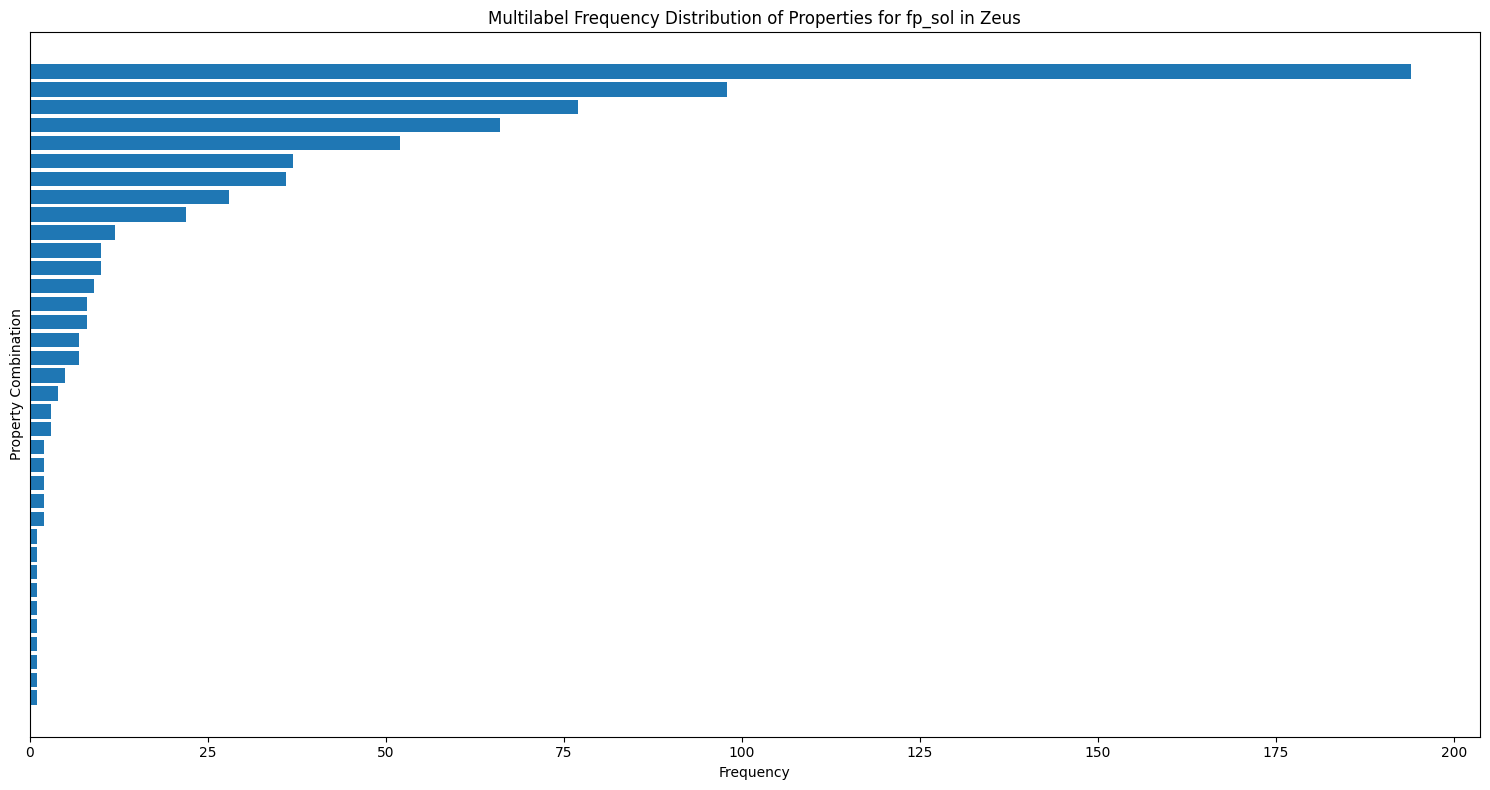

Statistics for dataset: eThor
       frequency
count        1.0
mean       172.0
std          NaN
min        172.0
25%        172.0
50%        172.0
75%        172.0
max        172.0
  property_combination  frequency
0        (reentrancy,)        172


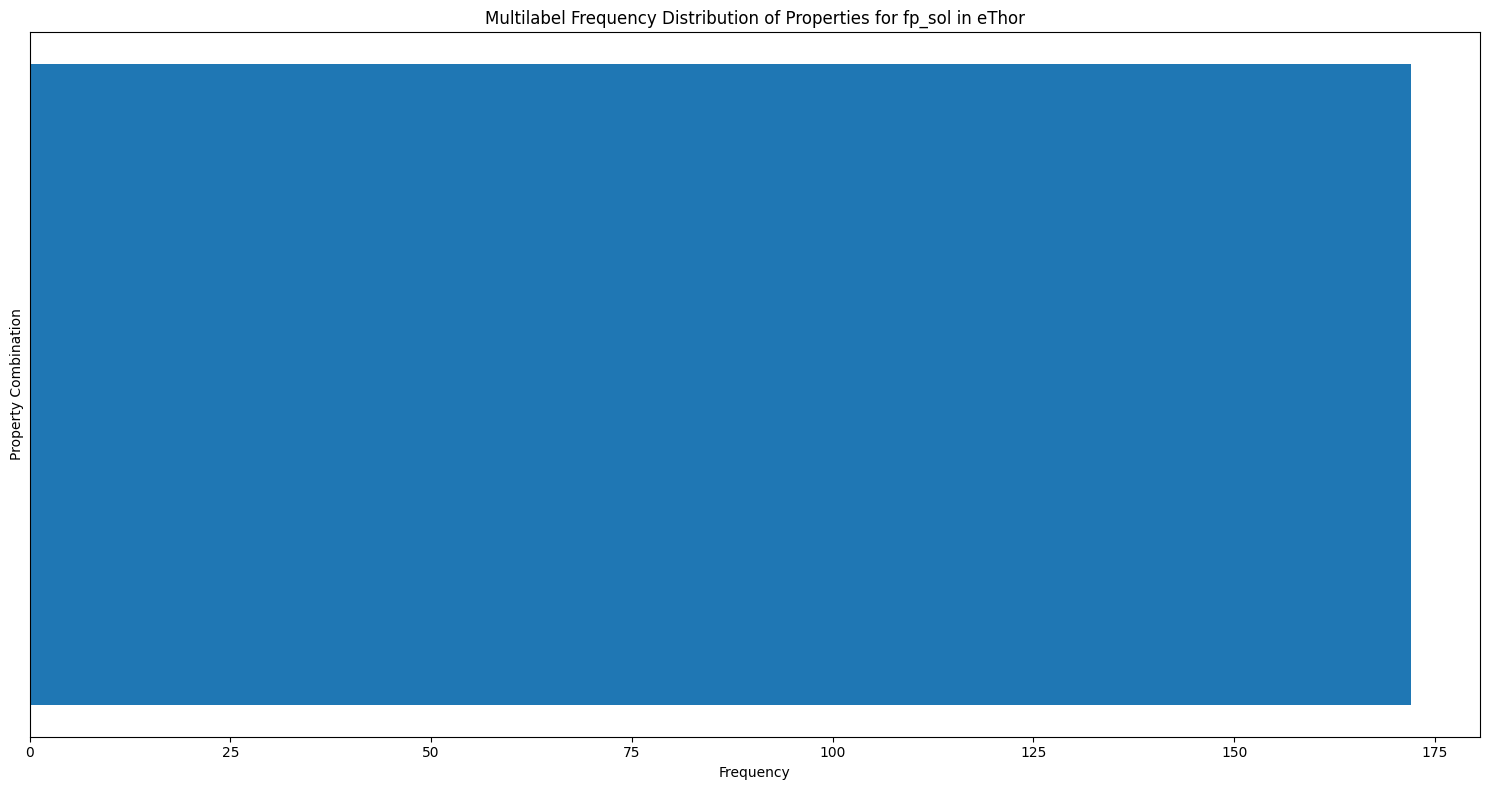

In [21]:
# Filter the dataset to include only rows where 'property_holds' equals True
df = df[df['property_holds'] == "t"]


# Function to plot multilabel frequency distribution for a given dataset
def plot_multilabel_distribution(data, dataset_name):
    # Group by 'fp_sol' and aggregate the 'property' values into a list
    property_combinations = data.groupby('fp_sol')['property'].apply(lambda x: tuple(sorted(set(x)))).reset_index()

    # Count the frequency of each unique combination of properties
    combination_counts = property_combinations['property'].value_counts().reset_index()
    combination_counts.columns = ['property_combination', 'frequency']

    # Print statistics
    print(f"Statistics for dataset: {dataset_name}")
    print(combination_counts.describe())
    print(combination_counts)

    # Plot the frequency of each combination
    plt.figure(figsize=(15, 8))
    plt.barh(combination_counts.index, combination_counts['frequency'])
    plt.xlabel('Frequency')
    plt.ylabel('Property Combination')
    plt.title(f'Multilabel Frequency Distribution of Properties for fp_sol in {dataset_name}')
    plt.gca().invert_yaxis()
    plt.yticks([])  # Hide y-axis labels
    plt.tight_layout()
    plt.show()


# Get the unique dataset names
unique_datasets = df['dataset'].unique()

# Loop through each dataset and create the plot
for dataset in unique_datasets:
    dataset_data = df[df['dataset'] == dataset]
    if not dataset_data.empty:  # Check if the dataset_data is not empty
        plot_multilabel_distribution(dataset_data, dataset)
    else:
        print(f"No data for dataset: {dataset}")
